In [145]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Задание

Цель: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

Описание задания:
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

Этапы работы:

<br>Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
<br>Проведите первичный анализ.
<br>Проверьте данные на пропуски. Удалите в случае обнаружения.
<br>Предложите альтернативный способ работы с пропусками
<br>Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно <br>сделать вывод об особенностях датасета/класса/признака)
<br>Преобразуйте категориальные признаки.
<br>Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
<br>Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
<br>Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для <br>этого используйте встроенную функцию score.
<br>Сформулируйте выводы по проделанной работе.
<br>Кратко опишите какие преобразования были сделаны с данными.
<br>Сравните точность двух моделей.
<br>Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?
<br>Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.

# Импортируем датасет с github

In [146]:
url = r'https://raw.githubusercontent.com/miracurue/Adult_project/main/adult.csv'
#url = r"D:\КУРСЫ\НЕТОЛОГИЯ\МАШИННОЕ ОБУЧЕНИЕ\1\Лекция_2\Лекция_2\adult.csv"

In [147]:
df = pd.read_csv(url, sep=',')

In [148]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [149]:
df.shape

(48842, 15)

# Пропуски

Пропущенные данные есть в колонках native-country, occupation и workclass, там они заполнены символом "?".
В колонках capital-gain и capital-loss много нулей: пока не понятно, это пропуски заполнены нулями или это какое-то смысловое значение.

Создадим датафрейм с пропущенными значениями  в 'occupation' и 'workclass'
Пропуски по этим колонкам находятся почти в одних и тех же строках (подавляющее большинство пересекается)

In [150]:
df2 = df[(df['occupation']=='?')|(df['workclass']=='?')].copy()

Заполним пропуски значеним None

In [151]:
df = df.replace('?', None)

# Сравним визуально распределения в двух таблицах. 
Посмотрим, какое распределение имеют значения в полном датасете df и в таблице с пропущенными значениями (df2), чтобы убедиться в случайности пропусков.

In [152]:
# оставим для построения графиков только колонки с категориальными данными, исключим колонки с пропущенными данными:
# workclass и occupation, а так же исключим колонки capital-gain и capital-loss.

columns = ['age', 'education',
       'marital-status', 'relationship', 'race', 'gender',
       'hours-per-week', 'native-country']

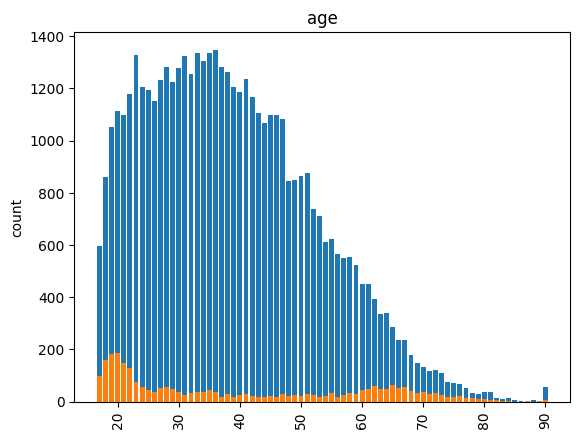

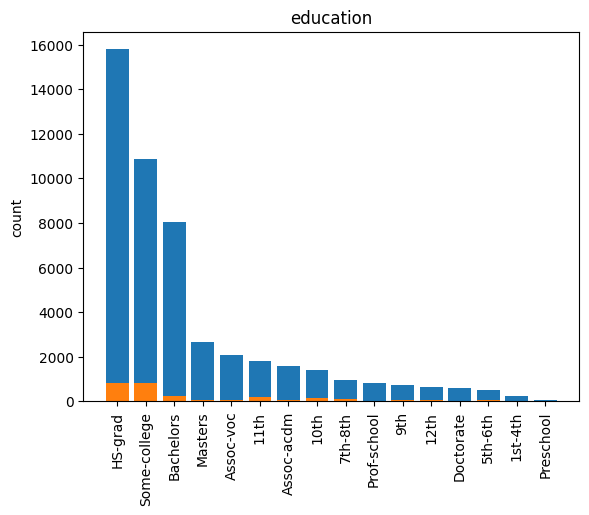

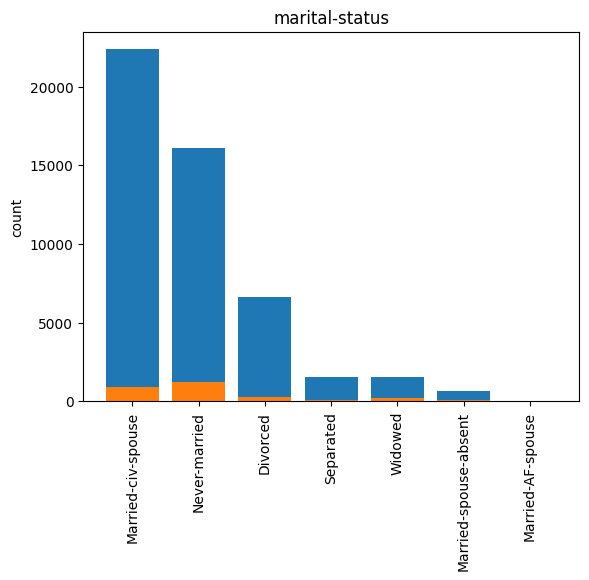

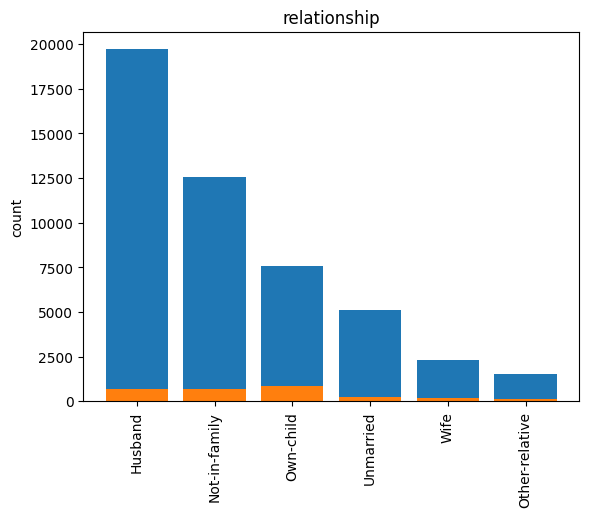

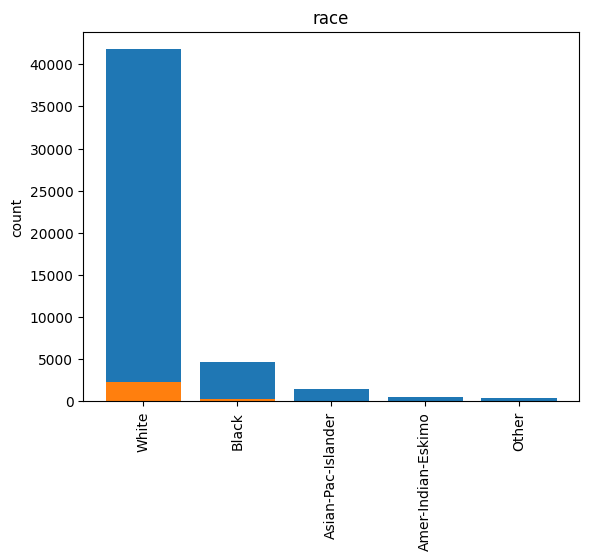

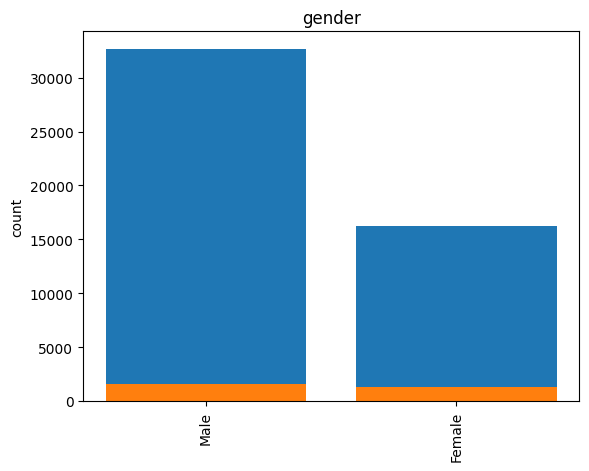

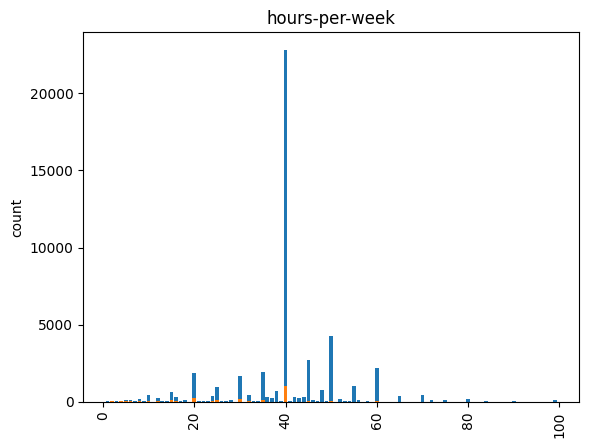

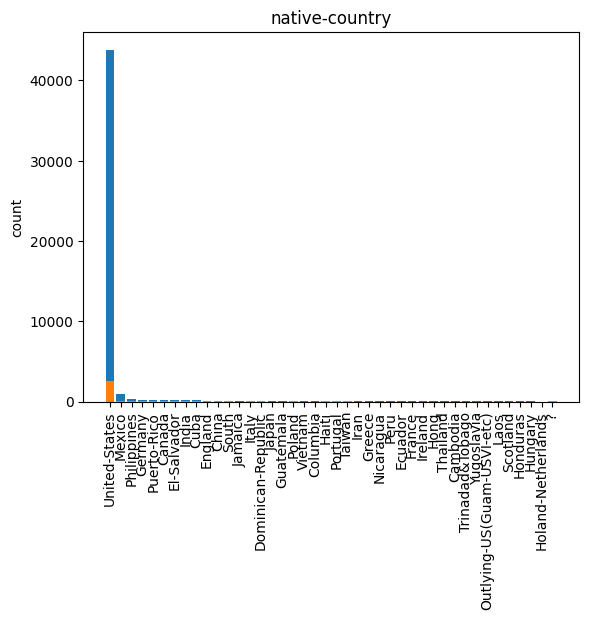

In [153]:
# Напишем цикл, чтобы посмотреть графики сразу по всем колонкам

for column in columns:

    # в переменные x и x2 поместим уникальные значения каждой колонки,
    # а в y и y2 - их количество

    x = df[column].value_counts().index
    y = df[column].value_counts().values
    x2 = df2[column].value_counts().index
    y2 = df2[column].value_counts().values

    fig, ax = plt.subplots()
    plt.bar(x=x, height=y)
    plt.bar(x=x2, height=y2)

    plt.ylabel('count')
    plt.title(column)

    plt.xticks(rotation=90)

    plt.show()

Вывод: пропуски, скорее всего, случайны. По графикам невозможно однозначно сказать, что в пропусках есть зависимость.

# Преобразуем категориальные признаки

In [154]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [155]:
df_without_col = df.drop(['income', 'fnlwgt'], axis=1)

In [156]:
df_encoded = pd.get_dummies(df_without_col, columns=['workclass', 'education',
       'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'])

In [157]:
df_encoded.head(1)

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Произведем масштабирование данных

In [158]:
scaler = MinMaxScaler()
df_encoded_norm = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

In [159]:
df_encoded_norm.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.109589,0.400000,0.000000,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.533333,0.000000,0.0,0.500000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.150685,0.733333,0.000000,0.0,0.397959,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.369863,0.600000,0.076881,0.0,0.397959,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.013699,0.600000,0.000000,0.0,0.295918,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Решение 1

Удалим пропуски и обучим модель без них.

In [160]:
df_encoded_norm[df_encoded_norm.isna().any(axis=1)].shape

(0, 104)

In [161]:
df_encoded_norm = df_encoded_norm.dropna(how='any', axis=0)

In [162]:
df_encoded_norm.shape

(48842, 104)

# Подготовим столбец с целевой переменной

In [163]:
targ_dict = {'<=50K': 0, '>50K':1}
df['income'] = df['income'].replace(targ_dict)

Построим модель логистической регрессии

In [167]:
# Разобьем данные на две группы: тренировочную и тестовую

X = df_encoded_norm
y = df['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [168]:
score = model.score(X_test, y_test)
score

0.8567918927218753